In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('part-00000-tid-6503057286819044125-9528d30b-04de-4e0f-b2fb-4ee7f1df03cb-261-1-c000.csv', low_memory=False)



In [5]:
df.shape

(109023, 33)

In [6]:
df.head()

,product_category_name,seller_id,product_id,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,review_creation_date,review_answer_timestamp,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,product_category_name_english,Unnamed: 32
0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02T10:56:33.000Z,2017-10-10T21:25:13.000Z,2017-10-18T00:00:00.000Z,1,...,10/11/2017 0:00,10/12/2017 3:43,500,19,8,13,maua,SP,housewares,NaN
1,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02T10:56:33.000Z,2017-10-10T21:25:13.000Z,2017-10-18T00:00:00.000Z,1,...,10/11/2017 0:00,10/12/2017 3:43,500,19,8,13,maua,SP,housewares,NaN
2,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02T10:56:33.000Z,2017-10-10T21:25:13.000Z,2017-10-18T00:00:00.000Z,1,...,10/11/2017 0:00,10/12/2017 3:43,500,19,8,13,maua,SP,housewares,NaN
3,perfumaria,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24T20:41:37.000Z,2018-08-07T15:27:45.000Z,2018-08-13T00:00:00.000Z,1,...,8/8/2018 0:00,8/8/2018 18:37,400,19,13,19,belo horizonte,SP,perfumery,NaN
4,automotivo,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08T08:38:49.000Z,2018-08-17T18:06:29.000Z,2018-09-04T00:00:00.000Z,1,...,8/18/2018 0:00,8/22/2018 19:07,420,24,19,21,guariba,SP,auto,NaN


# I. Recency
Recency in customer churn refers to the measure of how recently a customer has interacted with a company's product or service. It is a critical metric in customer relationship management (CRM) and is often used to predict customer churn. By analyzing recency, businesses can identify customers who may be at risk of churning and take proactive measures to retain them.

Measuring Recency
Recency can be measured using various metrics, depending on the type of business and the nature of customer interactions. Common measures include:

Last Purchase Date: For retail businesses, recency might be the date of the last purchase.

1. The last purchase date of every individual customer is taken using the group by function.
2. Recency is calculated by subtracting the last recent date available in the dataset with every customer's last purchase date.

In [3]:
from datetime import datetime
# Finding most recent date of purchase
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')


In [4]:
df['order_purchase_timestamp'].isna().sum()

23

In [5]:
df = df.dropna(subset=['order_purchase_timestamp'])

In [10]:
df['order_purchase_timestamp'].isna().sum()

0

In [6]:
# Convert all datetimes to be timezone-naive
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(lambda x: x.replace(tzinfo=None) if x is not pd.NaT else x)

In [7]:
# Find the most recent date of purchase
most_recent_date = df['order_purchase_timestamp'].max()

# Convert most_recent_date to a datetime object
most_recent_date = most_recent_date.to_pydatetime()
print('The most recent date in the available dataset is:', most_recent_date)

The most recent date in the available dataset is: 2018-09-03 09:06:57


In [8]:
# Find the last purchase date for each customer_id
df['last_purchase_date'] = df.groupby('customer_id')['order_purchase_timestamp'].transform('max')


In [9]:
df['recency'] = (most_recent_date - df['last_purchase_date']).dt.days

In [10]:
df['recency'].describe()

count    109000.000000
mean        246.216569
std         241.865056
min           0.000000
25%         121.000000
50%         227.000000
75%         356.000000
max       61606.000000
Name: recency, dtype: float64

In [11]:
# Define caps for recency
lower_cap = df['recency'].quantile(0.00)  # 5th percentile
upper_cap = df['recency'].quantile(0.98)  # 95th percentile

# Cap the values
df['recency'] = np.clip(df['recency'], lower_cap, upper_cap)


In [12]:
df.shape

(109000, 35)

In [13]:
print(lower_cap,upper_cap)

0.0 567.0


In [14]:
# Identify outliers
outliers = df[(df['recency'] < lower_bound) | (df['recency'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")

NameError: name 'lower_bound' is not defined

In [18]:
# Creating new dataframe "recency"
recency = df[['customer_unique_id','recency','last_purchase_date']].copy()
# Renaming columns
recency = recency.rename(columns={
    'last_purchase_date': 'LastPurchaseDate'
})

In [16]:
recency.head()

,customer_unique_id,recency,LastPurchaseDate
0,7c396fd4830fd04220f754e42b4e5bff,335.0,2017-10-02 10:56:33
1,7c396fd4830fd04220f754e42b4e5bff,335.0,2017-10-02 10:56:33
2,7c396fd4830fd04220f754e42b4e5bff,335.0,2017-10-02 10:56:33
3,af07308b275d755c9edb36a90c618231,40.0,2018-07-24 20:41:37
4,3a653a41f6f9fc3d2a113cf8398680e8,26.0,2018-08-08 08:38:49


In [100]:
recency['recency'].max()


567.0

In [101]:
recency.describe()

,recency
count,109000.000000
mean,244.976073
std,152.004255
min,0.000000
25%,121.000000
50%,227.000000
75%,356.000000
max,567.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109000 entries, 0 to 109022
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_name          108999 non-null  object        
 1   seller_id                      109000 non-null  object        
 2   product_id                     109000 non-null  object        
 3   order_id                       109000 non-null  object        
 4   customer_id                    109000 non-null  object        
 5   order_status                   109000 non-null  object        
 6   order_purchase_timestamp       109000 non-null  datetime64[ns]
 7   order_delivered_customer_date  109000 non-null  object        
 8   order_estimated_delivery_date  109000 non-null  object        
 9   order_item_id                  109000 non-null  object        
 10  shipping_limit_date            109000 non-null  object        
 11  

# Observations:
1. The average recency is approximately 244 days. This indicates that, on average, customers made their last purchase or engagement about 244 days ago.
2. The minimum recency value is 0.These customers represent very recent activity.
3. Customers with low recency values may be more receptive to promotions or re-engagement campaigns.
4. Higher recency values represents customers who have not made a purchase for an extended period. Strategies to re-engage or retain these      customers may be needed.
*Strategies to reduce customer's recencies:
1. Promotional Campaigns: Launch targeted promotional campaigns, such as discounts, special offers, or limited-time promotions
2. Loyalty Programs: Rewards customers for frequent purchases. Offer points, discounts, or exclusive access to encourage repeat business.
3. Reactivation Campaigns: Identify dormant customers (those with high recency values) and launch targeted reactivation campaigns. Provide special incentives or discounts to encourage them to return.

# Frequency

In [19]:
frequency = df.groupby('customer_unique_id')['order_id'].count()
df['frequency'] = df['customer_unique_id'].map(frequency)

In [20]:
# Creating a new dataframe "frequency"
frequency = df[['customer_unique_id','frequency']].copy()
frequency.head()

,customer_unique_id,frequency
0,7c396fd4830fd04220f754e42b4e5bff,4.0
1,7c396fd4830fd04220f754e42b4e5bff,4.0
2,7c396fd4830fd04220f754e42b4e5bff,4.0
3,af07308b275d755c9edb36a90c618231,1.0
4,3a653a41f6f9fc3d2a113cf8398680e8,1.0


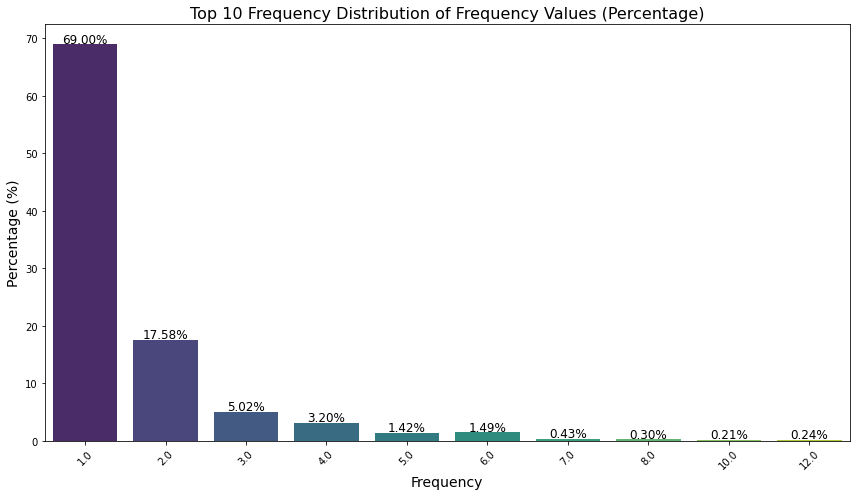

In [19]:
# Creating a new DataFrame "frequency"
frequency = df[['customer_unique_id', 'frequency']].copy()

# Creating frequency count and converting to percentages
frequency_count = frequency['frequency'].value_counts().sort_index()
frequency_percentage = (frequency_count / frequency_count.sum()) * 100

# Select top 10 counts
top_10_frequency = frequency_percentage.nlargest(10)

# Create a bar plot
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x=top_10_frequency.index, y=top_10_frequency.values, palette='viridis')

# Add titles and labels
plt.title('Top 10 Frequency Distribution of Frequency Values (Percentage)', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Rotate x labels if necessary
plt.xticks(rotation=45)

# Add percentage labels on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center',
                      xytext=(0, 5), 
                      textcoords='offset points', 
                      fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [110]:
frequency.describe()

,frequency
count,108996.000000
mean,1.808690
std,2.863368
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,75.000000


#### Observations:
1. The mean frequency is approximately 1.81, suggesting that, on average, customers make less than two purchases. 
   This indicates that a significant portion of the customer base tends to have infrequent purchase behavior.(~70%)
2. The maximum frequency of 75 suggests the presence of outliers, i.e., a few customers with exceptionally high purchase frequency. 
   These outliers could represent a specific segment of highly engaged or active customers.
3. Marketing Strategy Implications: For customers with a frequency of 1, strategies could focus on increasing engagement 
   and encouraging repeat purchases. For higher-frequency customers, loyalty programs or personalized offerings may be effective.

*To encourage one-time customers to make repeat purchases, businesses can implement:
1. Personalized Recommendations: Analyze the purchase history of one-time customers and provide personalized product recommendations based      on their preferences.
2. Loyalty Programs: Introduce a loyalty program that rewards customers for repeat purchases. Offer points, discounts, or exclusive perks       for every transaction.
3. Special Promotions: Create targeted promotions or exclusive offers for one-time customers. Provide time-limited discounts, buy-one-get-      one-free (BOGO) deals, or unique promotions to encourage them to make another purchase.
4. Post-Purchase Communication: Implement a strategic post-purchase communication strategy. Send personalized thank-you emails, follow-up        surveys, or feedback requests. Use these interactions to express appreciation, gather insights, and encourage future engagement.
5. Re-Engagement Campaigns: Design re-engagement campaigns specifically targeting one-time customers. Utilize email marketing, social media,    or other channels to remind them about your brand, showcase new products, and highlight any ongoing promotions.

In [21]:
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce').fillna(0).astype(int)
df['payment_value'] = pd.to_numeric(df['payment_value'], errors='coerce').fillna(0).astype(int)


In [22]:
monetary_value = df.groupby('customer_unique_id')['payment_value'].sum()


In [23]:
df['monetary_value'] = df['customer_unique_id'].map(monetary_value)


In [24]:
# Creating a new dataframe "monetary"
monetary = df[['customer_unique_id','monetary_value']].copy()
monetary.head()

,customer_unique_id,monetary_value
0,7c396fd4830fd04220f754e42b4e5bff,82.0
1,7c396fd4830fd04220f754e42b4e5bff,82.0
2,7c396fd4830fd04220f754e42b4e5bff,82.0
3,af07308b275d755c9edb36a90c618231,141.0
4,3a653a41f6f9fc3d2a113cf8398680e8,179.0


In [24]:
monetary.describe()

,monetary_value
count,108996.000000
mean,369.532854
std,1590.472325
min,0.000000
25%,70.000000
50%,133.000000
75%,278.000000
max,109312.000000


# Observations:
1. The average monetary value per customer is 369. This represents the central tendency of spending across the customer base.
2. The standard deviation is relatively high at 1590.49, indicating a wide dispersion in spending. 
   This suggests that customer spending varies significantly, and there may be outliers with exceptionally high monetary values.
3. The wide range in monetary values highlights the heterogeneity in customer spending habits.
4. The concentration of values in the lower quartiles (Q1 and Q2) suggests that a considerable portion of customers has relatively moderate     spending.
5. Identification and focus on high-value customers may lead to strategies that enhance customer retention and increase overall revenue.

* To gain more value from customers:
1. Personalized Marketing
2. Customer Segmentation: Segment customers based on their purchasing behavior, demographics, or preferences.
   Design targeted marketing strategies for each segment to address their specific needs and preferences.
3. Exclusive Offers for High-Value Customers

C:\Users\Lenovo\anaconda2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1000 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


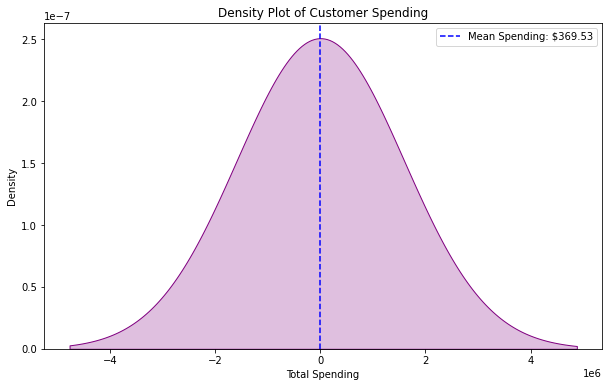

In [118]:
plt.figure(figsize=(10, 6))

# Adjust the bandwidth for a smoother plot
sns.kdeplot(df['monetary_value'], shade=True, color='purple', bw=1000)

# Add a vertical line at the mean spending
mean_spending = df['monetary_value'].mean()
plt.axvline(mean_spending, color='blue', linestyle='--', label=f'Mean Spending: ${mean_spending:.2f}')

# Add titles and labels
plt.title('Density Plot of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Density')

# Show the plot
plt.legend()
plt.show()

# Tenure

In [25]:
# finding the latest and earliest purchase dates for each customer
latest_purchase_date = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
earliest_purchase_date = df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()


In [26]:
# Calculate customer tenure in days
latest_purchase_date['customer_tenure'] = (latest_purchase_date['order_purchase_timestamp']- earliest_purchase_date['order_purchase_timestamp']).dt.days

In [27]:
df = pd.merge(df, latest_purchase_date[['customer_unique_id', 'customer_tenure']], on='customer_unique_id', how='left')

In [28]:
# Tenure
tenure = df[['customer_unique_id','customer_tenure']].copy()
#tenure[tenure['customer_tenure']==0].count()
tenure.describe()

,customer_tenure
count,108996.000000
mean,5.958209
std,37.757764
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,633.000000


# Observations:
1. The 25th, 50th (median), and 75th percentiles all have a value of 0. This indicates that a significant portion of customers has a 
   recorded tenure of 0, possibly implying that a considerable number of customers made a single purchase.
* To encourage customers to make repeated visits
1. Personalized Marketing
2. Special Offers for Returning Customers
3. Feedback and Surveys
4. Community Building: Encourage customers to share their experiences, create user-generated content, and participate in discussions. 

In [29]:
df['late_deliveries'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)
# total count of late deliveries for each customer
late_deliveries_count = df.groupby('customer_id')['late_deliveries'].sum().reset_index()

# Rename the column for clarity
late_deliveries_count = late_deliveries_count.rename(columns={'late_deliveries': 'total_late_deliveries'})

#late_deliveries_count['total_late_deliveries'].unique()
#late_deliveries_count.head()
df['late_deliveries'].value_counts()

0    100782
1      8218
Name: late_deliveries, dtype: int64

In [30]:
#To count number of late deliveries
#late_deliveries_count = df['late_deliveries'].eq(1).sum()
print("% of customer experienced late deliveries:",(8849 / 113102)*100 )

% of customer experienced late deliveries: 7.823911159838022


In [31]:
orders_per_customer = df.groupby('customer_unique_id')['order_id'].nunique().reset_index()

# Rename the column for clarity
orders_per_customer = orders_per_customer.rename(columns={'order_id': 'num_orders'})

# Merge 'num_orders' back into the original DataFrame 'customer_unique_id'
df = pd.merge(df, orders_per_customer, on='customer_unique_id', how='left')

In [59]:
orders_per_customer['num_orders'].value_counts()

1     85702
2      2385
3       167
4        28
5         7
6         4
7         2
8         1
14        1
Name: num_orders, dtype: int64

In [80]:
df.to_csv('clv_data.csv',index = False)

In [32]:
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce').fillna(0).astype(int)
df['payment_value'] = pd.to_numeric(df['payment_value'], errors='coerce').fillna(0).astype(int)

In [61]:
# create a grouped DataFrame based on individual customers
grouped_df = df.groupby('customer_unique_id')\
.agg({'customer_zip_code_prefix'      : 'max',
'customer_city'                 : 'max',
'customer_state'                : 'max',
'order_id'                      : 'nunique',
'product_id'                    : 'nunique',
'price'                         : 'sum',
'freight_value'                 : 'sum',
'payment_type'                  : 'max',
'payment_installments'          : 'max',
'payment_value'                 : 'sum',
'review_score'                  : 'mean',
'recency'                       : 'max',
'num_orders'                    : 'nunique',
'frequency'                     : 'mean',
'monetary_value'                : 'sum',
'customer_tenure'               : 'max',
'late_deliveries'               : 'sum'}).reset_index()

grouped_df.head()


KeyboardInterrupt



In [85]:
df.dtypes

product_category_name                    object
seller_id                                object
product_id                               object
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                            object
shipping_limit_date                      object
price                                    object
freight_value                             int32
payment_sequential                       object
payment_type                             object
payment_installments                     object
payment_value                             int32
customer_unique_id                       object
customer_zip_code_prefix                 object
customer_city                            object
customer_state                          

In [33]:
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce').fillna(0).astype(int)

# Customer Segmentation

In [34]:
# Customer segmentation:
bins = [-1, 60, 120, 220, float('inf')]
labels = ['Recent', 'Moderately Recent', 'Not So Recent', 'Inactive']
df['RecencySegment'] = pd.cut(df['recency'], bins=bins, labels=labels, right=False)

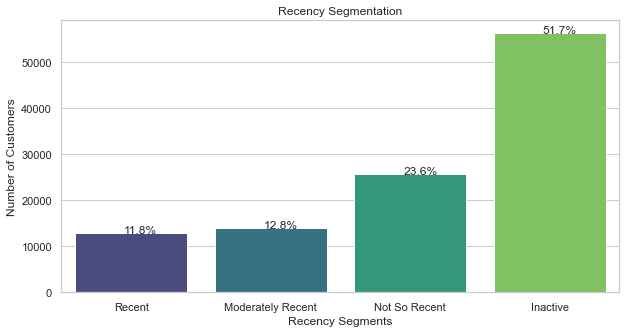

In [36]:
sns.set(style="whitegrid")

# Plot the segmentation
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='RecencySegment', data=df, order=labels, palette='viridis')

# Calculate the percentages
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 1
    ax.annotate(percentage, (x, y), size=12)

plt.title('Recency Segmentation')
plt.xlabel('Recency Segments')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
'''Segmentation Breakdown:
[-1, 60): Customers with recency values from 0 to 59 (inclusive) are labeled as "Recent."
[60, 120): Customers with recency values from 60 to 119 (inclusive) are labeled as "Moderately Recent."
[120, 220): Customers with recency values from 120 to 219 (inclusive) are labeled as "Not So Recent."
[220, inf): Customers with recency values of 220 and above are labeled as "Inactive."'''

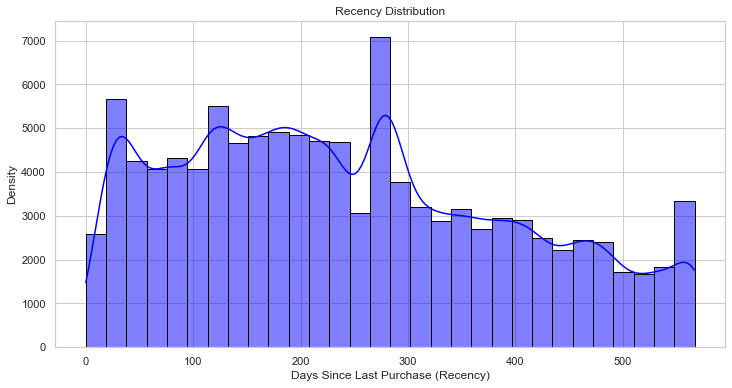

In [34]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))  # Increase the size of the plot
sns.histplot(recency['recency'], bins=30, kde=True, color='blue', edgecolor='black')

# Add titles and labels
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase (Recency)")
plt.ylabel("Density")

# Show the plot
plt.show()


In [ ]:
Insights from the Recency Distribution Graph
High Density Around Specific Intervals:

There are clear peaks around the 0-50, 200-250, and 300-350 day ranges. 
This suggests that there are significant groups of customers who made their last purchase around 
these intervals.
The spike around 300 days is particularly notable, indicating a large number of customers who made their last 
purchase around this time.

Overall Distribution:

The distribution is relatively even across the range, except for the notable peaks. This indicates that customers' recency is fairly spread out, with consistent activity over time.
Potential Seasonal Trends:

The peaks might indicate seasonal trends or marketing campaigns that were particularly effective 
during certain times of the year.

Long Tail:

There is a long tail towards the right of the distribution, indicating a smaller 
number of customers who haven't made a purchase in over 400 days. 
These customers might need re-engagement strategies.

C:\Users\Lenovo\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, "Frequency of customer's purchases")

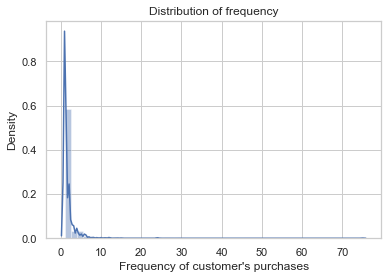

In [38]:
# Frequency distribution
sns.distplot(frequency.frequency)
plt.title("Distribution of frequency")
plt.xlabel("Frequency of customer's purchases")


In [35]:
# Create a new column 'order_month' by extracting the month and year from 'order_purchase_timestamp'
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

In [36]:
# Assuming df is your dataframe and monthly_orders has been calculated as before
# Sort the monthly_orders DataFrame by 'Number_of_Orders' in descending order and select the top 12
top_12_months = monthly_orders.sort_values(by='Number_of_Orders', ascending=False).head(12)

# Plotting the number of orders for the top 12 months
plt.figure(figsize=(12, 6))
sns.barplot(x='order_month', y='Number_of_Orders', data=top_12_months, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 12 Months with Highest Number of Orders')
plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.show()

NameError: name 'monthly_orders' is not defined

# Insights from frequency:
1. 25th Percentile (Q1): 25% of the customers have a frequency of 1 or less.
2. 50th Percentile (Median or Q2): The median frequency is 1, indicating that 50% of the customers made 1 or fewer purchases.
3. 75th Percentile (Q3): 75% of the customers have a frequency of 2 or less.
4. Maximum: The maximum frequency is 75, suggesting that there is at least one customer with a significantly higher number of purchases.

Interpretatin:
1. Distribution: The distribution of the frequency data is right-skewed, as the mean is greater than the median. 
   This indicates that there are some customers with a higher frequency of purchases, pulling the mean to the right.
2. Majority of Customers: The majority of customers (50% or more) make 1 or fewer purchases.
3. Variability: The relatively high standard deviation indicates variability in customer purchasing behavior.  
   Some customers make significantly more purchases than others.

In [37]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = monetary['monetary_value'].quantile(0.25)
Q3 = monetary['monetary_value'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR




In [38]:
print(lower_bound,upper_bound)

-242.0 590.0


In [45]:
# Identify outliers
outliers = monetary[(monetary['monetary_value'] < lower_bound) | (monetary['monetary_value'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 12451


C:\Users\Lenovo\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


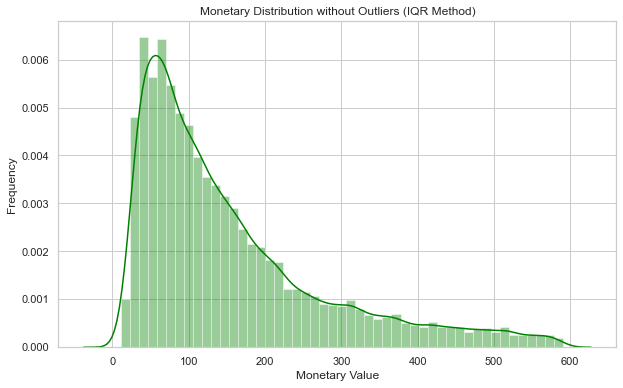

In [42]:
# Filter out values outside the bounds to remove outliers
monetary_data_no_outliers = monetary['monetary_value'][(monetary['monetary_value'] >= lower_bound) \
& (monetary['monetary_value'] <= upper_bound)]

# Set the style for the plot (optional, but it enhances visual appearance)
sns.set(style="whitegrid")

# Plot histogram for data without outliers
plt.figure(figsize=(10, 6))
sns.distplot(monetary_data_no_outliers, color = 'green')
#sns.histplot(monetary_data_no_outliers, bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Monetary Distribution without Outliers (IQR Method)')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

In [41]:
monetary_data_no_outliers.describe()

count    96545.000000
mean       155.249169
std        123.360152
min          0.000000
25%         65.000000
50%        115.000000
75%        204.000000
max        590.000000
Name: monetary_value, dtype: float64

# Insights:
1. Mean: The mean (average) monetary value is approximately 155. On average, customers spend around 155.
2. Standard Deviation (std): The standard deviation is approximately 123. This indicates the amount of variability 
   or dispersion in the monetary data after removing outliers.
3. 25th Percentile (Q1): 25% of the customers spent 65. or less.
4. 50th Percentile (Median or Q2): The median monetary value is 115, indicating that 50% of the customers spent 115 or less.
5. 75th Percentile (Q3): 75% of the customers spent 204 or less.


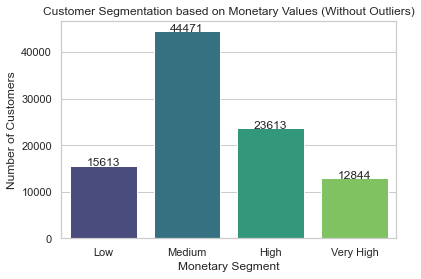

In [43]:
# Assuming monetary_data_no_outliers is your data and monetary is your DataFrame
# Create a new column for segmentation
monetary['MonetarySegment'] = pd.cut(monetary_data_no_outliers, bins=[0, 50, 150, 300, 600], labels=['Low', 'Medium', 'High', 'Very High'])

# Visualize segmentation with counts above each bar
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='MonetarySegment', data=monetary, palette='viridis')

# Add counts above each bar
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count), ha='center', va='baseline', size=12)

plt.title('Customer Segmentation based on Monetary Values (Without Outliers)')
plt.xlabel('Monetary Segment')
plt.ylabel('Number of Customers')
plt.show()

Distribution of Customers:

The largest segment is the "Medium" monetary segment, with over 40,000 customers. 
This indicates that most customers spend a moderate amount.

The "High" segment also has a significant number of customers, suggesting a healthy portion of 
your customer base spends more than the average.
The "Very High" segment is the smallest, but these customers likely represent the most valuable 
segment in terms of revenue.

The "Low" segment, while not the largest, still represents a considerable number of customers.
Revenue Opportunities:

The "Medium" and "High" segments are substantial and present opportunities for upselling and cross-selling. Targeting these customers with tailored promotions could increase their lifetime value.
The "Very High" segment, despite being the smallest, should be given special attention. These customers could be targeted with loyalty programs or exclusive offers to retain them.
Customer Engagement:

The "Low" segment might benefit from re-engagement strategies to move them up to higher spending segments. Understanding their barriers to spending more could inform these strategies.
Recommendations
Marketing Strategies:

Medium and High Segments: Implement personalized marketing campaigns to encourage more frequent purchases or 
higher value purchases. Use targeted ads, personalized emails, and special discounts.
Very High Segment: Develop a loyalty program with exclusive perks, early access to sales, and 
personalized service to retain these high-value customers.

Low Segment: Re-engage with these customers through surveys to understand their needs and barriers. Offer introductory discounts or bundle deals to encourage higher spending.
Product Bundling:

Create product bundles that are appealing to each segment. For example, offer bundle deals on frequently purchased items for the "Medium" segment and premium bundles for the "High" and "Very High" segments.
Customer Feedback:

Collect feedback from different segments to understand their preferences and pain points. 
Use this feedback to improve products, services, and customer experience.

In [44]:
# Calculate average purchase value
average_purchase_value = df['monetary_value'].mean()

# Calculate average purchase frequency
purchase_frequency = df['frequency'].mean()

# Calculate average customer lifespan (in days)
average_customer_lifespan = df['customer_tenure'].mean()

# Calculate historical CLV
historical_clv = average_purchase_value * purchase_frequency * average_customer_lifespan

print('Expected value a customer bring to business based on data: ', round(historical_clv, 2), 'brazillian real')

Expected value a customer bring to business based on data:  3982.29 brazillian real


In [45]:
late_deliveries_count['total_late_deliveries'].unique()
#late_deliveries_count[late_deliveries_count['total_late_deliveries']==9].count()

array([ 0,  1,  2,  7,  6,  4,  3,  5,  8, 21])

In [102]:
# Segment customers based on the total count of late deliveries
bins = [-1, 0, 3, float('inf')]
labels = ['No Late Deliveries', 'Low', 'High']
late_deliveries_count['LateDeliverySegment'] = pd.cut(late_deliveries_count['total_late_deliveries'], bins=bins, labels=labels)

# Display the segmentation results
print(late_deliveries_count['LateDeliverySegment'].value_counts())

No Late Deliveries    84085
Low                    7021
High                     76
Name: LateDeliverySegment, dtype: int64


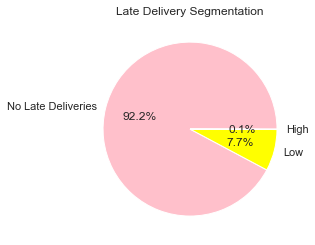

In [104]:
# late deliveries segmentation
segment_counts = late_deliveries_count['LateDeliverySegment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=['pink', 'yellow', 'red'])
plt.title('Late Delivery Segmentation')
plt.show()

In [46]:
reviewScore = df['review_score'].value_counts(normalize = True) * 100
reviewScore


5     56.885321
4     19.146789
1     12.163303
3      8.382569
2      3.412844
0      0.005505
20     0.000917
35     0.000917
60     0.000917
16     0.000917
Name: review_score, dtype: float64

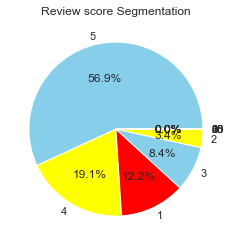

In [106]:
# Plot a pie chart
plt.figure(figsize=(6, 4))
plt.pie(reviewScore, labels=reviewScore.index, autopct='%1.1f%%', colors=['skyblue', 'yellow', 'red'])
plt.title('Review score Segmentation')
plt.show()

 #### Observation
1. The majority of customers are highly satisfied, as indicated by the high percentage in the 5.0 category.
2. A notable portion of customers gave scores indicating moderate to high satisfaction (4.0).
3. Around 23% of customers are not satified.

# Impact on customer satisfaction from late deliveries

In [52]:
order_reviews_df=pd.read_csv('olist_order_reviews_dataset.csv')

In [53]:
orders_df=pd.read_csv('olist_orders_dataset.csv')

In [54]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [55]:
# Customers satisfaction based on late deliveries

reviewScoreAnalysis = order_reviews_df.merge(
    orders_df[['order_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']],
    on='order_id',
    how='inner'  # 'inner' join to keep only matching rows from both DataFrames
)

In [56]:
reviewScoreAnalysis.dtypes

review_id                        object
order_id                         object
review_score                      int64
review_comment_title             object
review_comment_message           object
review_creation_date             object
review_answer_timestamp          object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [57]:
# Convert date columns to datetime
reviewScoreAnalysis['order_approved_at'] = pd.to_datetime(reviewScoreAnalysis['order_approved_at'])
reviewScoreAnalysis['order_delivered_carrier_date'] = pd.to_datetime(reviewScoreAnalysis['order_delivered_carrier_date'])
reviewScoreAnalysis['order_estimated_delivery_date'] = pd.to_datetime(reviewScoreAnalysis['order_estimated_delivery_date'])
reviewScoreAnalysis['order_delivered_customer_date'] = pd.to_datetime(reviewScoreAnalysis['order_delivered_customer_date'])

reviewScoreAnalysis['delivered_estimated'] = (reviewScoreAnalysis['order_delivered_customer_date'] - reviewScoreAnalysis['order_estimated_delivery_date']).dt.days



In [58]:
ontimeDelivery_review = reviewScoreAnalysis[reviewScoreAnalysis.delivered_estimated > 0][['review_score', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date']].mean()
lateDelivery_review = reviewScoreAnalysis[reviewScoreAnalysis.delivered_estimated < 0][['review_score', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date']].mean()
comparision_review = pd.DataFrame([ontimeDelivery_review, lateDelivery_review]).T
comparision_review.rename(columns = {0 : 'on time delivery', 1 : 'late delivery'}, inplace = True)
comparision_review

C:\Temp\ipykernel_9280\3303359468.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ontimeDelivery_review = reviewScoreAnalysis[reviewScoreAnalysis.delivered_estimated > 0][['review_score', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date']].mean()
C:\Temp\ipykernel_9280\3303359468.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  lateDelivery_review = reviewScoreAnalysis[reviewScoreAnalysis.delivered_estimated < 0][['review_score', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date']].mean()


,on time delivery,late delivery
review_score,2.25598,4.282892


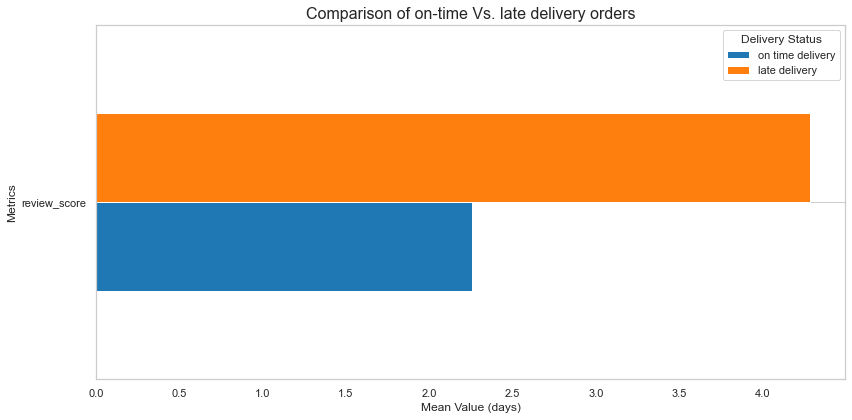

In [59]:
# Plot the data
comparision_review.plot(kind='barh', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Comparison of on-time Vs. late delivery orders', fontsize=16)
plt.xlabel('Mean Value (days)')
plt.ylabel('Metrics')
plt.legend(loc='best', title='Delivery Status')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
'''#### Interpretation: 
1. On-Time Delivery Average Review Score: 4.296071
   Customers who received their deliveries on time gave an average review score of approximately 4.04. 
   This indicates a relatively high level of satisfaction among customers who experienced on-time deliveries.

2. Late Delivery Average Review Score: 2.567125.
   Customers who experienced late deliveries gave an average review score of approximately 2.56. 
   This suggests a lower level of satisfaction among customers who faced delays in their deliveries.
3. Timely delivery appears to be positively correlated with higher customer satisfaction.
4. Late deliveries may have a negative impact on the overall customer experience, leading to lower review scores.
5. It took 25 days on an average for the orders to get delivered to the customers for late delivery orders, 
   while it took just 9 days for on-time delivery orders.
6. On an average, orders were delivered 14 days before the estimated date of delivery for on-time delivered orders.
'''

In [47]:
rfm_df = df[['customer_id','recency','frequency','monetary_value']]
rfm_df.head()

,customer_id,recency,frequency,monetary_value
0,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0
1,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0
2,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0
3,b0830fb4747a6c6d20dea0b8c802d7ef,40.0,1.0,141.0
4,41ce2a54c0b03bf3443c3d931a367089,26.0,1.0,179.0


In [48]:
#### Saving rfm_df as csv on dir: Project_X
rfm_df.to_csv('rfm_df.csv', index=False)


In [72]:
final = df[['customer_id','customer_unique_id','recency','frequency','monetary_value','customer_tenure',\
            'late_deliveries','num_orders','review_score']]

In [73]:
### Saving final as csv
final.to_csv('rfm_addf.csv',index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('rfm_addf.csv')

In [4]:
df.columns

Index(['customer_id', 'customer_unique_id', 'recency', 'frequency',
       'monetary_value', 'customer_tenure', 'late_deliveries', 'num_orders',
       'review_score'],
      dtype='object')

In [5]:
df.shape

(109000, 9)

In [6]:
df['customer_id'].nunique()

91186

In [7]:
df['clv'] = df['monetary_value'] * (df['frequency'] / df['customer_tenure']) * df['customer_tenure']


In [8]:
# Define segments
bins = [0, 2000, 5000, np.inf]
labels = ['Low CLV', 'Medium CLV', 'High CLV']
df['clv_segment'] = pd.cut(df['clv'], bins=bins, labels=labels)

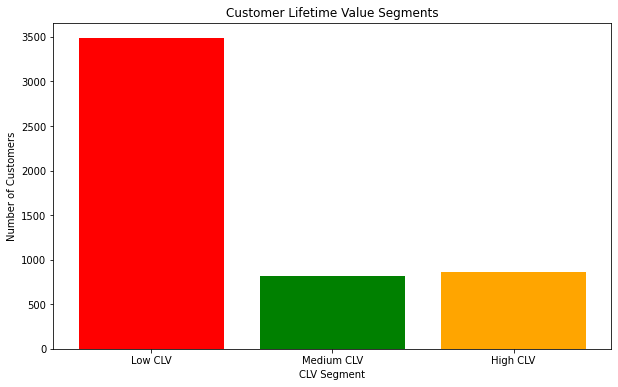

In [9]:
# Plot the distribution of CLV segments
clv_counts = df['clv_segment'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(clv_counts.index, clv_counts.values, color=['red', 'green', 'orange'])
plt.title('Customer Lifetime Value Segments')
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.show()

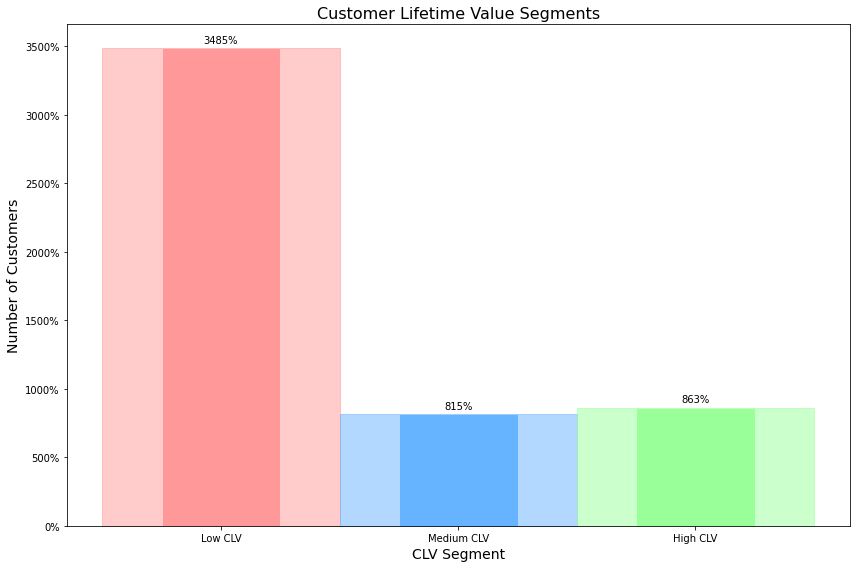

In [12]:
# Plot the bars
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define the colors and labels
colors = ['#ff9999','#66b3ff','#99ff99']
labels = ['Low CLV', 'Medium CLV', 'High CLV']
bars = ax.bar(clv_counts.index, clv_counts.values, color=colors, edgecolor='white', width=0.5)

# Add text annotations
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add the curved areas and text
for i, (x, y) in enumerate(zip(clv_counts.index, clv_counts.values)):
    if labels[i] == 'Low CLV':
        ax.fill_between([i-0.5, i+0.5], [0, 0], [y, y], color=colors[i], alpha=0.5)
    elif labels[i] == 'Medium CLV':
        ax.fill_between([i-0.5, i+0.5], [0, 0], [y, y], color=colors[i], alpha=0.5)
    elif labels[i] == 'High CLV':
        ax.fill_between([i-0.5, i+0.5], [0, 0], [y, y], color=colors[i], alpha=0.5)

# Set the title and labels
ax.set_title('Customer Lifetime Value Segments', fontsize=16)
ax.set_xlabel('CLV Segment', fontsize=14)
ax.set_ylabel('Number of Customers', fontsize=14)

# Customize the y-axis to show percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "%d%%" % x))

plt.tight_layout()
plt.show()

In [67]:
# Descriptive Statistics
descriptive_stats = final.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
             recency      frequency  monetary_value  customer_tenure  \
count  108995.000000  108993.000000   108993.000000    108993.000000   
mean      245.580036       1.808694      369.537346         5.958373   
std       153.475442       2.863407     1590.493909        37.758271   
min         0.000000       1.000000        0.000000         0.000000   
25%       121.000000       1.000000       70.000000         0.000000   
50%       227.000000       1.000000      133.000000         0.000000   
75%       356.000000       2.000000      278.000000         0.000000   
max       700.000000      75.000000   109312.000000       633.000000   

       late_deliveries     num_orders   review_score  
count    108995.000000  108993.000000  108995.000000  
mean          0.075389       1.084978       4.052865  
std           0.264019       0.378094       1.386650  
min           0.000000       1.000000       0.000000  
25%           0.000000       1.000000       4.000000

In [51]:
# Create a copy of the original DataFrame
final_transformed = final.copy()
final_transformed['recency'] = final_transformed['recency'] + 1

In [52]:
# Add a small constant (e.g., 1) to 'recency' to handle zero values
final_transformed['recency'] = final_transformed['recency'] + 1

# Log transform 'recency', 'frequency', and 'monetary_value' with addition of 1
columns_to_log_transform = ['recency', 'frequency', 'monetary_value']
final_transformed[columns_to_log_transform] = np.log1p(final_transformed[columns_to_log_transform])

final_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109000 entries, 0 to 108999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         109000 non-null  object 
 1   customer_unique_id  108996 non-null  object 
 2   recency             109000 non-null  float64
 3   frequency           108996 non-null  float64
 4   monetary_value      108996 non-null  float64
 5   customer_tenure     108996 non-null  float64
 6   late_deliveries     109000 non-null  int32  
 7   num_orders          108996 non-null  float64
 8   review_score        109000 non-null  int32  
dtypes: float64(5), int32(2), object(2)
memory usage: 7.5+ MB


In [53]:
# Compute correlation matrix
columns_to_drop = ['customer_unique_id', 'customer_id']
corr_final = final_transformed.drop(columns = columns_to_drop, axis=1)
correlation_matrix = corr_final.corr()
# Print result
correlation_matrix


,recency,frequency,monetary_value,customer_tenure,late_deliveries,num_orders,review_score
recency,1.000000,0.051903,0.010554,0.016732,-0.017231,0.041372,-0.040556
frequency,0.051903,1.000000,0.566521,0.221587,-0.031057,0.395359,-0.116093
monetary_value,0.010554,0.566521,1.000000,0.135950,-0.000710,0.222819,-0.137168
customer_tenure,0.016732,0.221587,0.135950,1.000000,-0.015475,0.600522,0.026394
late_deliveries,-0.017231,-0.031057,-0.000710,-0.015475,1.000000,-0.013350,-0.306010
num_orders,0.041372,0.395359,0.222819,0.600522,-0.013350,1.000000,0.017841
review_score,-0.040556,-0.116093,-0.137168,0.026394,-0.306010,0.017841,1.000000


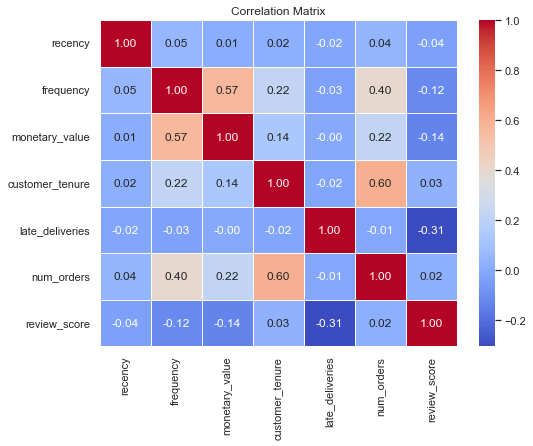

In [54]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# ### Insights:
1. Recency Correlations:
        recency has a weak positive correlation with frequency (0.05). This suggests that more recent customers might tend to make purchases more frequently.

2. Frequency Correlations:
        frequency has a moderate positive correlation with both monetary_value (0.57) and num_orders (0.40). This indicates that customers who make more frequent purchases tend to spend more and place a higher number of orders.

3. Monetary Value Correlations:
        monetary_value has a moderate positive correlation with frequency (0.57) and a weaker positive correlation with num_orders (0.22). This reinforces the idea that customers who spend more in each transaction also tend to make more frequent purchases.

4. Customer Tenure Correlations:
        customer_tenure has a weak positive correlation with both num_orders (0.60) and recency (0.02). This suggests that longer-tenured customers tend to make more orders and might also have more recent purchases.

5. Late Deliveries Correlations:
        late_deliveries has a weak negative correlation with review_score (-0.33). This indicates that customers who experience more late deliveries are likely to give lower review scores.

6. Review Score Correlations:
        review_score has a weak negative correlation with both frequency (-0.14) and monetary_value (-0.14). This suggests that customers who make less frequent purchases or spend less might be more critical and give lower review scores.

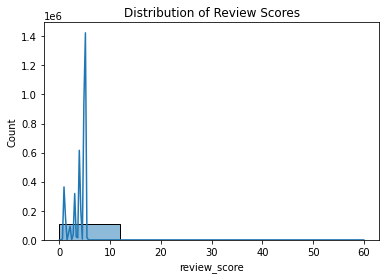

In [74]:
# Customer Segmentation Based on Review Score
sns.histplot(final, x='review_score', bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.show()

In [55]:
# Assuming a threshold for 'recency'
churn_threshold_days = 180
final['churn'] = (final['recency'] > churn_threshold_days).astype(int).astype(str)

# Analyze features for churn prediction
churn_analysis = final.groupby('churn').agg({
    'monetary_value': 'mean',
    'frequency': 'mean',
    'customer_tenure': 'mean',
    'late_deliveries': 'mean',
    'num_orders': 'mean'
}).reset_index()

# Print insights
print("Churn Analysis:")
print(churn_analysis)



Churn Analysis:
  churn  monetary_value  frequency  customer_tenure  late_deliveries  \
0     0      358.245448   1.661107         5.321343         0.075493   
1     1      376.748714   1.903038         6.365348         0.075331   

   num_orders  
0    1.064367  
1    1.098150  


C:\Temp\ipykernel_3856\611842155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['churn'] = (final['recency'] > churn_threshold_days).astype(int).astype(str)


In [56]:
import pandas as pd
from tabulate import tabulate

# Assuming a threshold for 'recency'
churn_threshold_days = 180
final['churn'] = (final['recency'] > churn_threshold_days).astype(int).astype(str)

# Function to calculate mode
def mode(series):
    return series.mode().iloc[0]

# Analyze features for churn prediction
churn_analysis = final.groupby('churn').agg({
    'monetary_value': 'mean',
    'frequency': 'mean',
    'customer_tenure': 'mean',
    'late_deliveries': 'mean',
    'num_orders': 'mean'
}).reset_index()

# Print insights using tabulate
print("Churn Analysis:")
print(tabulate(churn_analysis, headers='keys', tablefmt='fancy_grid'))

# Alternatively, for a richer presentation in Jupyter Notebook
from IPython.display import display, HTML

# Convert DataFrame to HTML and display
html_table = churn_analysis.to_html(index=False, classes='table table-striped table-bordered')
display(HTML(html_table))


Churn Analysis:
╒════╤═════════╤══════════════════╤═════════════╤═══════════════════╤═══════════════════╤══════════════╕
│    │   churn │   monetary_value │   frequency │   customer_tenure │   late_deliveries │   num_orders │
╞════╪═════════╪══════════════════╪═════════════╪═══════════════════╪═══════════════════╪══════════════╡
│  0 │       0 │          358.245 │     1.66111 │           5.32134 │         0.0754934 │      1.06437 │
├────┼─────────┼──────────────────┼─────────────┼───────────────────┼───────────────────┼──────────────┤
│  1 │       1 │          376.749 │     1.90304 │           6.36535 │         0.0753312 │      1.09815 │
╘════╧═════════╧══════════════════╧═════════════╧═══════════════════╧═══════════════════╧══════════════╛


C:\Temp\ipykernel_3856\2700601745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['churn'] = (final['recency'] > churn_threshold_days).astype(int).astype(str)


churn,monetary_value,frequency,customer_tenure,late_deliveries,num_orders
0,358.245448,1.661107,5.321343,0.075493,1.064367
1,376.748714,1.903038,6.365348,0.075331,1.098150


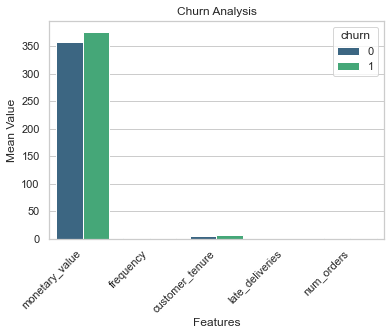

In [57]:
# Visualize Churn Analysis without log-transformed features
churn_analysis_melted = pd.melt(churn_analysis, id_vars='churn', var_name='feature', value_name='mean_value')
sns.barplot(data=churn_analysis_melted, x='feature', y='mean_value', hue='churn', palette='viridis')
plt.title('Churn Analysis')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Temp\ipykernel_3856\228631274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['churn'] = (final['recency'] > churn_threshold_days).astype(int).astype(str)
C:\Temp\ipykernel_3856\228631274.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[features_for_churn] = scaler.fit_transform(final[features_for_churn])


Churn Analysis:
  churn  monetary_value  frequency  customer_tenure  late_deliveries  \
0     0       -0.007097  -0.051542        -0.016867         0.000375   
1     1        0.004537   0.032950         0.010783        -0.000240   

   num_orders  
0   -0.054507  
1    0.034845  


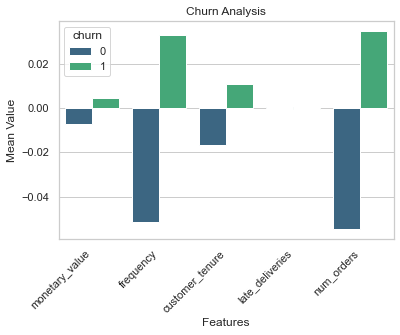

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming a threshold for 'recency'
churn_threshold_days = 180
final['churn'] = (final['recency'] > churn_threshold_days).astype(int).astype(str)

# Features for churn prediction
features_for_churn = ['monetary_value', 'frequency', 'customer_tenure', 'late_deliveries', 'num_orders']

# Standardize features
scaler = StandardScaler()
final[features_for_churn] = scaler.fit_transform(final[features_for_churn])

# Analyze features for churn prediction
churn_analysis = final.groupby('churn').agg({
    'monetary_value': 'mean',
    'frequency': 'mean',
    'customer_tenure': 'mean',
    'late_deliveries': 'mean',
    'num_orders': 'mean'
}).reset_index()

# Print insights
print("Churn Analysis:")
print(churn_analysis)

# Visualize Churn Analysis without log-transformed features
churn_analysis_melted = pd.melt(churn_analysis, id_vars='churn', var_name='feature', value_name='mean_value')
sns.barplot(data=churn_analysis_melted, x='feature', y='mean_value', hue='churn', palette='viridis')
plt.title('Churn Analysis')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.show()

# ### Insights:
1. Monetary Value:
        Customers who churned (churn = 1) have a positive standardized value for monetary value (0.0049), indicating that they tend to have a slightly higher monetary value compared to those who did not churn (churn = 0). However, the difference is relatively small.

2. Frequency:
        Customers who churned have a positive standardized value for frequency (0.03), suggesting that they tend to make purchases more frequently compared to those who did not churn.

3. Customer Tenure:
        Customers who churned have a positive standardized value for customer tenure (0.012309), indicating that they tend to have a slightly longer tenure compared to those who did not churn.

4. Late Deliveries:
        Customers who churned have a negative standardized value for late deliveries (-0.013), suggesting that they tend to experience slightly fewer late deliveries compared to those who did not churn.

5. Number of Orders:
        Customers who churned have a positive standardized value for the number of orders (0.034), indicating that they tend to place a slightly higher number of orders compared to those who did not churn.

In [79]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108995 entries, 0 to 108994
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_id     108995 non-null  object 
 1   recency         108995 non-null  int64  
 2   frequency       108993 non-null  float64
 3   monetary_value  108993 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.2+ MB


In [59]:
# Bin RFM values
# Recency Binning
rfm_df['recency_score'] = pd.qcut(rfm_df['recency'], q=4, labels=False, duplicates='drop')

# Frequency Binning
rfm_df['frequency_score'] = pd.qcut(rfm_df['frequency'], q=4, labels=False, duplicates='drop')

# Monetary Binning
rfm_df['monetary_score'] = pd.qcut(rfm_df['monetary_value'], q=4, labels=False, duplicates='drop')


C:\Temp\ipykernel_3856\2759063112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['recency_score'] = pd.qcut(rfm_df['recency'], q=4, labels=False, duplicates='drop')
C:\Temp\ipykernel_3856\2759063112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['frequency_score'] = pd.qcut(rfm_df['frequency'], q=4, labels=False, duplicates='drop')
C:\Temp\ipykernel_3856\2759063112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [60]:
# Calculate RFM score
rfm_df['rfm_score'] = rfm_df['recency_score'] + rfm_df['frequency_score'] + rfm_df['monetary_score']
rfm_df.head()

C:\Temp\ipykernel_3856\3532329496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['rfm_score'] = rfm_df['recency_score'] + rfm_df['frequency_score'] + rfm_df['monetary_score']


,customer_id,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score,rfm_score
0,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0
1,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0
2,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0
3,b0830fb4747a6c6d20dea0b8c802d7ef,40.0,1.0,141.0,0,0.0,2.0,2.0
4,41ce2a54c0b03bf3443c3d931a367089,26.0,1.0,179.0,0,0.0,2.0,2.0


In [79]:
rfm_df.head()

,customer_id,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score,rfm_score,segment
0,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular
1,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular
2,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular
3,b0830fb4747a6c6d20dea0b8c802d7ef,40.0,1.0,141.0,0,0.0,2.0,2.0,Inactive
4,41ce2a54c0b03bf3443c3d931a367089,26.0,1.0,179.0,0,0.0,2.0,2.0,Inactive


In [80]:
final.head()

,customer_id,customer_unique_id,recency,frequency,monetary_value,customer_tenure,late_deliveries,num_orders,review_score
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,40.0,1.0,141.0,0.0,0,1.0,4
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,26.0,1.0,179.0,0.0,0,1.0,5


In [76]:
merged_df.columns

Index(['customer_id', 'recency_x', 'frequency_x', 'monetary_value_x',
       'recency_score', 'frequency_score', 'monetary_score', 'rfm_score',
       'segment', 'customer_unique_id', 'recency_y', 'frequency_y',
       'monetary_value_y', 'customer_tenure', 'late_deliveries', 'num_orders',
       'review_score'],
      dtype='object')

In [81]:
merged_df = pd.merge(rfm_df, final, on='customer_id', how='inner')

In [82]:
merged_df.head()

,customer_id,recency_x,frequency_x,monetary_value_x,recency_score,frequency_score,monetary_score,rfm_score,segment,customer_unique_id,recency_y,frequency_y,monetary_value_y,customer_tenure,late_deliveries,num_orders,review_score
0,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
1,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
2,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
3,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
4,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4


In [83]:
columns_to_remove = ['recency_x', 'frequency_x', 'monetary_value_x']
merged_df.drop(columns=columns_to_remove, inplace=True)

In [84]:
merged_df.rename(columns={
    'recency_y': 'recency',
    'frequency_y': 'frequency',
    'monetary_value_y': 'monetary_value'
}, inplace=True)

In [85]:
merged_df.to_csv('merged_df.csv', index=False)


In [86]:
merged_df.corr()

,recency_score,frequency_score,monetary_score,rfm_score,recency,frequency,monetary_value,customer_tenure,late_deliveries,num_orders,review_score
recency_score,1.000000,0.096187,0.017639,0.635818,0.951891,0.220528,-0.019738,0.019731,-0.044638,0.096756,0.001995
frequency_score,0.096187,1.000000,0.481605,0.612993,0.095570,0.455630,0.253022,0.130177,-0.053313,0.290704,-0.130442
monetary_score,0.017639,0.481605,1.000000,0.748884,0.017580,0.268880,0.227873,0.110571,-0.014667,0.216978,-0.156009
rfm_score,0.635818,0.612993,0.748884,1.000000,0.606758,0.415633,0.193652,0.113476,-0.049654,0.266666,-0.128352
recency,0.951891,0.095570,0.017580,0.606758,1.000000,0.183434,-0.017002,0.013829,-0.048913,0.077067,0.000813
frequency,0.220528,0.455630,0.268880,0.415633,0.183434,1.000000,0.113994,0.038199,-0.062647,0.339475,0.035131
monetary_value,-0.019738,0.253022,0.227873,0.193652,-0.017002,0.113994,1.000000,0.016670,-0.022239,0.101373,-0.166082
customer_tenure,0.019731,0.130177,0.110571,0.113476,0.013829,0.038199,0.016670,1.000000,-0.020754,0.560123,0.034477
late_deliveries,-0.044638,-0.053313,-0.014667,-0.049654,-0.048913,-0.062647,-0.022239,-0.020754,1.000000,-0.035800,-0.251808
num_orders,0.096756,0.290704,0.216978,0.266666,0.077067,0.339475,0.101373,0.560123,-0.035800,1.000000,0.050789


# RFM score:
1. A higher RFM score typically indicates a more favorable customer behavior.
2. Recency (R):
   High Score: The customer has made a purchase very recently.
   Recent customers are often more engaged and have a higher likelihood of making additional purchases.
3. Frequency (F): High Score: The customer makes frequent purchases. High-frequency customers are loyal and consistently engaged with your business, indicating a strong relationship.
4. Monetary (M): High Score: The customer has a higher monetary value, indicating higher spending. High monetary value suggests that the customer is a high spender, contributing significantly to your revenue.

#### When combining these components into an overall RFM score, a higher total RFM score implies that a customer is recent, makes frequent purchases, and has a high monetary value. Therefore, customers with high RFM scores are often considered the most valuable and desirable for a business.

In [61]:
# Calculate correlation matrix
correlation_matrix = rfm_df[['recency_score', 'frequency_score', 'monetary_score', 'rfm_score']].corr()

#Print correlation matrix:
correlation_matrix

,recency_score,frequency_score,monetary_score,rfm_score
recency_score,1.000000,0.035437,0.005208,0.660100
frequency_score,0.035437,1.000000,0.387196,0.473594
monetary_score,0.005208,0.387196,1.000000,0.732087
rfm_score,0.660100,0.473594,0.732087,1.000000


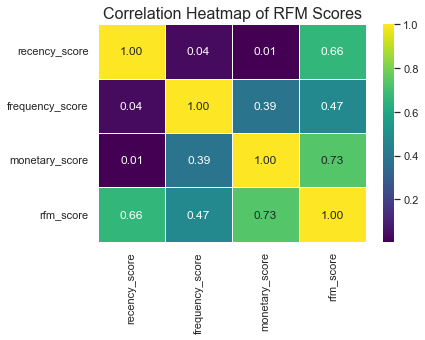

In [62]:
# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of RFM Scores', fontsize=16)
plt.show()


# ### Interpretations:
1. The RFM score is strongly influenced by monetary value, with a notable positive correlation.
2. Recency has a moderate positive impact on the overall RFM score, but the relationship is not as strong as monetary value.
3. Frequency has a moderate positive impact on both monetary value and the overall RFM score.
4. Therefore, we will use rfm_score to decide churn

In [63]:
# Define customer segments based on RFM score
segment_labels = segment_labels = ['Inactive', 'Regular', 'Engaged']
rfm_df['segment'] = pd.cut(rfm_df['rfm_score'], bins=[0, 3, 6, 9], labels=segment_labels)

C:\Temp\ipykernel_3856\1235650739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['segment'] = pd.cut(rfm_df['rfm_score'], bins=[0, 3, 6, 9], labels=segment_labels)


# #### bins decided based on rfm score:
I. rfm score(0-3): inactive:
1. These customers may have low recency, frequency, and monetary contributions.
2. They might be considered less engaged or potentially at risk of churning.
   
rfm score(4-6): regular:
1. This group represents customers with moderate recency, frequency, and monetary values.
2. They are considered reasonably engaged and contribute to the business consistently.
   
rfm score(7-9): engaged:
1. This segment includes customers with high recency, frequency, and monetary contributions.
2. These are the most valuable and engaged customers, likely to be loyal and provide significant revenue.

In [64]:
rfm_df.head()

,customer_id,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score,rfm_score,segment
0,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular
1,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular
2,9ef432eb6251297304e76186b10a928d,335.0,4.0,82.0,2,1.0,1.0,4.0,Regular
3,b0830fb4747a6c6d20dea0b8c802d7ef,40.0,1.0,141.0,0,0.0,2.0,2.0,Inactive
4,41ce2a54c0b03bf3443c3d931a367089,26.0,1.0,179.0,0,0.0,2.0,2.0,Inactive


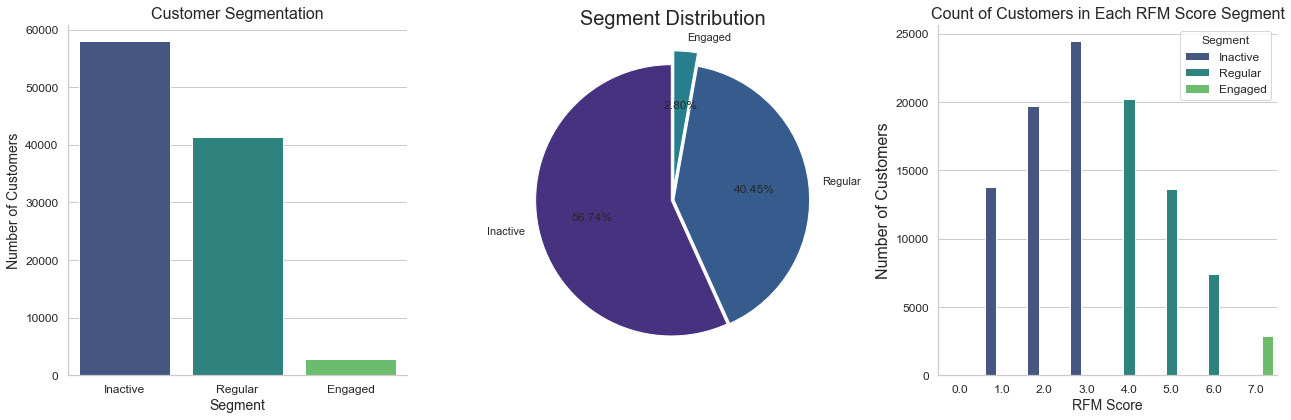

In [65]:
plt.figure(figsize=(18, 6))

# Bar Plot
plt.subplot(1, 3, 1)
sns.countplot(x='segment', data=rfm_df, palette='viridis')
plt.title('Customer Segmentation', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# Pie Chart 
plt.subplot(1, 3, 2)
segment_counts = rfm_df['segment'].value_counts()
colors = sns.color_palette('viridis')
explode = (0.01, 0.01, 0.1)  # Explode the 'Engaged' slice
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.2f%%', colors=colors, startangle=90, explode=explode)
plt.title('Segment Distribution', fontsize=20)

# Count Plot
plt.subplot(1, 3, 3)
sns.countplot(x='rfm_score', hue='segment', data=rfm_df, palette='viridis')
plt.title('Count of Customers in Each RFM Score Segment', fontsize=16)
plt.xlabel('RFM Score', fontsize=14)
plt.ylabel('Number of Customers', fontsize=16)
plt.legend(title='Segment', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()

In [87]:
 #Analyze churn
churn_threshold = 180
df['churn'] = (df['recency'] > churn_threshold_days).astype(int)

df['churn'] = df['churn'].astype(str)

# Analyze features for churn prediction
churn_analysis = df.groupby('churn').agg({
    'monetary_value': 'mean',
    'frequency': 'mean',
    'customer_tenure': 'mean',
    'late_deliveries': 'mean',
    'num_orders': 'mean',
    'review_score': 'mean'
}).reset_index()

# Print insights
print("RFM Analysis:")
print(rfm_df.head())

print("\nChurn Analysis:")
print(churn_analysis)

RFM Analysis:
                        customer_id  recency  frequency  monetary_value  \
0  9ef432eb6251297304e76186b10a928d      335        4.0            82.0   
1  9ef432eb6251297304e76186b10a928d      335        4.0            82.0   
2  9ef432eb6251297304e76186b10a928d      335        4.0            82.0   
3  b0830fb4747a6c6d20dea0b8c802d7ef       40        1.0           141.0   
4  41ce2a54c0b03bf3443c3d931a367089       26        1.0           179.0   

   recency_score  frequency_score  monetary_score  rfm_score   segment  
0              2              1.0             1.0        4.0   Regular  
1              2              1.0             1.0        4.0   Regular  
2              2              1.0             1.0        4.0   Regular  
3              0              0.0             2.0        2.0  Inactive  
4              0              0.0             2.0        2.0  Inactive  

Churn Analysis:
  churn  monetary_value  frequency  customer_tenure  late_deliveries  \
0     0 

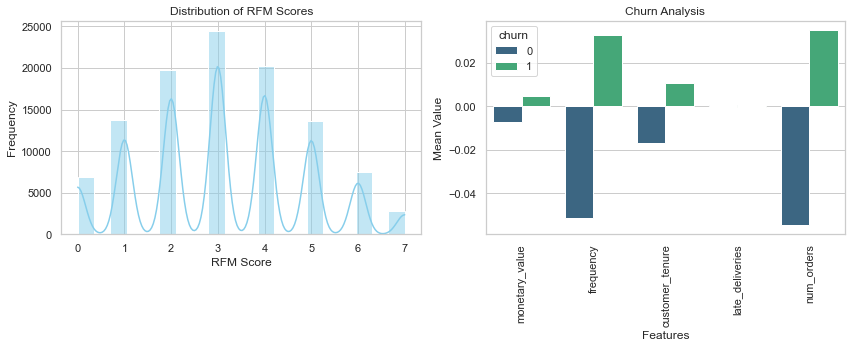

In [66]:
# Create subplots for RFM analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Visualize RFM scores
sns.histplot(data=rfm_df, x='rfm_score', kde=True, bins=20, color='skyblue')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')

# Create subplots for Churn analysis
plt.subplot(1, 2, 2)

# Visualize churn analysis
churn_analysis_melted = pd.melt(churn_analysis, id_vars='churn', var_name='feature', value_name='mean_value')
sns.barplot(data=churn_analysis_melted, x='feature', y='mean_value', hue='churn', palette='viridis')
plt.title('Churn Analysis')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation='vertical')
# Display the plots
plt.tight_layout()
plt.show()

# ## Customer Retention
Customer retention refers to a company’s ability to turn customers into repeat buyers and prevent them from switching to a competitor.

### Why?
Acquiring a new customer can be five to 25 times more expensive than holding on to an existing one.
### Customer retention benefits

    Cost savings: Customer retention is generally more cost-effective than acquiring first-time customers
    Positive word of mouth marketing: Loyal customers are more likely to tell their friends and family about your brand
    A better bottom line: Increasing retention rates by just 5 percent can increase revenue by 25 percent to 95 percent
    
  #### 6 strategies to improve customer retention

    Deliver fast support
    Personalize interactions
    Invest in employees
    Meet customers where they are
    Gather customer feedback
    Incentivise loyalty



# 1. Segmentation Understanding:

#### Regular Customers (Segment: Regular):
   - **Insight:** Moderate recency, frequency, and monetary value.
   - **Strategy:** Implement personalized promotions for related products, maintaining engagement and increasing average order value.

#### Inactive Customers (Segment: Inactive):
   - **Insight:** Low recency, frequency, and monetary value.
   - **Strategy:** Launch reactivation campaigns with special offers and targeted messaging to reignite interest.

### 2. Churn Analysis Insights:

   - **Churned Customers:**
      - **Insight:** Churn associated with late deliveries and review scores.
      - **Strategy:** Address late deliveries promptly, gather feedback, and showcase resolutions to improve customer satisfaction.

### 3. Recency-Frequency-Monetary (RFM) Score Utilization:

   - **Recency Score:**
      - **Insight:** Win-back potential in higher recency scores.
      - **Strategy:** Launch time-sensitive promotions for recent customers, emphasizing exclusive benefits.

   - **Frequency Score:**
      - **Insight:** Low engagement in customers with low frequency scores.
      - **Strategy:** Introduce a loyalty program with tiered benefits to increase engagement.

   - **Monetary Score:**
      - **Insight:** Create VIP programs for high monetary score customers.
      - **Strategy:** Design premium VIP programs with exclusive benefits, aiming to increase the monetary value of moderate-scoring customers.

### 4. RFM Score (Overall) Strategy:

   - **High RFM Score :**
      - **Insight:** Indicates highly engaged and valuable customers.
      - **Strategy:** Implement an exclusive loyalty program, offering personalized perks, early access to promotions, and special events to maintain their loyalty.

   - **Moderate RFM Score :**
      - **Insight:** Indicates room for improvement and potential for increased engagement.
      - **Strategy:** Launch targeted promotions and personalized communication to elevate their RFM scores, encouraging more frequent and higher-value transactions.

   - **Low RFM Score :**
      - **Insight:** Indicates less engaged and lower-value customers.
      - **Strategy:** Implement win-back campaigns, offering special incentives to encourage repeat purchases and regain their interest.

### 5. Customer Experience Enhancement:

   - **Late Deliveries:**
      - **Insight:** Optimize the supply chain to reduce late deliveries.
      - **Strategy:** Implement real-time tracking and proactive communication for better customer satisfaction.

   - **Review Scores:**
      - **Insight:** Positive reviews correlate with customer retention.
      - **Strategy:** Encourage customers to leave positive reviews and address negative ones promptly.

### 6. Communication Strategies:

   - **Personalized Messaging:**
      - **Insight:** Tailor communications based on customer segments and RFM scores.
      - **Strategy:** Use dynamic content in emails showcasing relevant products and promotions based on each customer's past behavior.

   - **Reactivation Campaigns:**
      - **Insight:** Inactive customers show potential for reactivation.
      - **Strategy:** Employ multi-channel communication with personalized incentives to win back inactive customers.

### 7. Retention KPIs and Measurement:

   - **Key Performance Indicators (KPIs):**
      - **Insight:** Monitor customer retention rate, repeat purchase rate, and customer lifetime value.
      - **Strategy:** Regularly track and analyze KPIs to measure the success of campaigns, adjusting strategies based on performance metrics.

   - **Feedback and Surveys:**
      - **Insight:** Customer feedback provides valuable insights.
      - **Strategy:** Conduct regular surveys to gather feedback and make data-driven improvements.

### 8. Continuous Improvement:

   - **Data Analysis:**
      - **Insight:** Regularly analyze customer behavior data for trends.
      - **Strategy:** Adapt strategies based on evolving customer preferences and market dynamics.

   - **Adaptability:**
      - **Insight:** Stay informed about industry changes.
      - **Strategy:** Adapt the retention strategy to align with emerging market trends, maintaining a competitive edge.

### 9. Employee Training and Customer Service:

   - **Training Programs:**
      - **Insight:** Well-trained staff contributes to positive interactions.
      - **Strategy:** Provide ongoing training to customer service teams, empowering them to handle concerns proactively.

   - **Customer Service Excellence:**
      - **Insight:** Customer service excellence positively impacts brand perception.
      - **Strategy:** Implement a customer-centric culture within the organization to ensure excellence in every customer interaction.

### Conclusion:

This retention strategy, enriched with specific insights from RFM and churn analyses, includes a tailored approach for customers based on their overall RFM scores. The goal is to maximize engagement, increase loyalty, and address specific needs of each customer segment. Regular evaluation and adaptability are crucial to sustaining a successful retention strategy in the dynamic landscape of customer preferences and market trends.
